In [1]:
import os
import sys

import torch
import numpy as np
import pandas

import matplotlib.pyplot as plt

In [2]:
os.chdir("../src/")

In [ ]:
from datagen.synthetic.multiple.intertwinedswissrolls import IntertwinedSwissRolls
from expB.learn_mfld_distance import train, test
from expB.myNNs import *

In [ ]:
# train_set, val_set, test_set = IntertwinedSwissRolls.load_splits("/azuredrive/dumps/expC_dist_learner_for_adv_ex/rdm_swrolls/rdm_swiss_rolls_k2n3/data")



In [ ]:
cfg_dict = IntertwinedSwissRolls.get_demo_cfg_dict(n=3, k=3)
train_set, val_set, test_set = IntertwinedSwissRolls.make_train_val_test_splits(cfg_dict=cfg_dict)

In [ ]:
train_set.norm_factor, val_set.norm_factor

In [ ]:
torch.max(val_set.all_points) - torch.min(val_set.all_points)

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(train_set.normed_all_points[:, 0], train_set.normed_all_points[:, 1], s=0.01)
plt.scatter(val_set.normed_all_points[:, 0], val_set.normed_all_points[:, 1], s=1)

plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame({"x": train_set.normed_all_points[:, 0],
     "y": train_set.normed_all_points[:, 1],
     "z": train_set.normed_all_points[:, 2],
     "color": ["red"]*train_set.normed_all_points.shape[0]})

df2 = pd.DataFrame({"x": val_set.normed_all_points[:, 0],
     "y": val_set.normed_all_points[:, 1],
     "z": val_set.normed_all_points[:, 2],
     "color": ["blue"] * val_set.normed_all_points.shape[0]})

df_tot = df.append(df2, ignore_index=True)

In [ ]:
fig = px.scatter_3d(df_tot, x='x', y='y', z='z', color="color", opacity=0.2)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=1))
fig.show()

In [3]:
os.chdir("./expC/")

torch.Size([50000, 2])


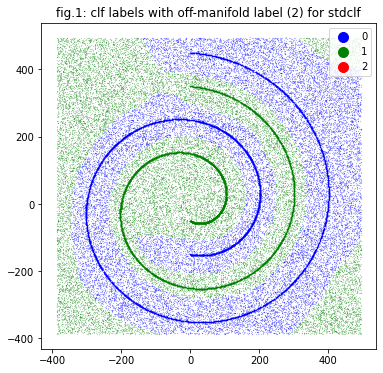

In [6]:
%run analysis.py --dump_dir /azuredrive/dumps/expC_dist_learner_for_adv_ex/rdm_swrolls/rdm_swiss_rolls_k2n3/6/ --on val --num_points 100000



In [ ]:
targets_fn = "/azuredrive/dumps/expC_dist_learner_for_adv_ex/rdm_swrolls/rdm_swiss_rolls_k2n2/3/logits/val/targets.pt"
targets = torch.load(targets_fn)

data_dir = "/azuredrive/dumps/expC_dist_learner_for_adv_ex/rdm_swrolls/rdm_swiss_rolls_k2n3/data/"
train_set, val_set, test_set = IntertwinedSwissRolls.load_splits(data_dir)



In [ ]:
val_set.class_labels[torch.min(val_set.all_actual_distances, axis=1)[0] < val_set.D] = torch.min(val_set.all_actual_distances, axis=1)[1][torch.min(val_set.all_actual_distances, axis=1)[0] < val_set.D]
val_set.class_labels[torch.min(val_set.all_actual_distances, axis=1)[0] > val_set.D] = 2

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(val_set.normed_all_points[:, 0][val_set.class_labels == 0],\
           val_set.normed_all_points[:, 1][val_set.class_labels == 0], label="S1", s=0.1, c="blue")
plt.scatter(val_set.normed_all_points[:, 0][val_set.class_labels == 1],\
           val_set.normed_all_points[:, 1][val_set.class_labels == 1], label="S2", s=0.1, c="green")
plt.scatter(val_set.normed_all_points[:, 0][val_set.class_labels == 2],\
           val_set.normed_all_points[:, 1][val_set.class_labels == 2], label="off", c="red", s=0.1)
plt.legend(markerscale=10)
plt.show()

In [ ]:
plt.hist(torch.min(val_set.all_actual_distances, axis=1)[0].numpy())

In [ ]:
import plotly.graph_objects as go

In [ ]:
go.Figure(data=[
                go.Scatter3d(
                    x=gen_nd_grid[:, 0],
                    y=gen_nd_grid[:, 1],
                    z=gen_nd_grid[:, 1],
                    color=gen_pred_classes,
                    mode='markers',
                    marker=dict(
                        size=2,
                        color=color_for_class,                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                    )
                )]

In [ ]:
val_set.all_points

In [ ]:
type(torch.Tensor([2, 2])) == torch.Tensor